In [1]:
from agent import *
import numpy as np
from game import Game
from collections import deque
import time
import torch
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import pickle
import multiprocessing as mp
import math
import os
print("Numpy version:", np.__version__)
print("PyTorch version:", torch.__version__)
print("Number of CPU cores: ", mp.cpu_count())

Numpy version: 1.24.1
PyTorch version: 2.0.1+cpu
Number of CPU cores:  8


# Deep Q-Learning function

In [2]:
global pool
depth = 4
mp.freeze_support()
mp.set_start_method('spawn')
pool = mp.Pool(processes=8)

In [3]:
def expectimax():
    """Expectimax agent"""
  
    # keep track of different actions taken per episode
    actions = np.array([0, 0, 0, 0])
    
    # Starting with a fresh board
    env.reset(2)                        # reset environment
    
    state = env.current_state()         # get the current state      
    score = env.score                                 # initialize the score
    total_steps = 0
    
    # keep playing
    while not env.done:        
        action_values = act(state, pool, depth)    # select an action
        # Clear the output in Jupyter Notebook
        clear_output(wait=True)

        # Print the string representation
        env.draw_board(env.game_board)
        
        actions_sorted = [(i, v) for i, v in enumerate(action_values[0])]
        actions_sorted = sorted(actions_sorted, key=lambda x: x[1], reverse=True)
        action_idx = 0
        env.moved = False
        while not env.moved:
            
            action_elem = actions_sorted[action_idx]
            action_idx += 1

            action = np.int64(action_elem[0])
            actions[action] += 1
            env.step(action, action_values)                     # send the action to environment
            next_state = env.current_state()  # get the current state 

            # save the results of the step

            done = env.done                             # check if episode has finished
            state = next_state
            total_steps += 1

            if done:
                break 



        

# Initialization & training

In [4]:
# Create the environment with 4x4 board
env = Game()


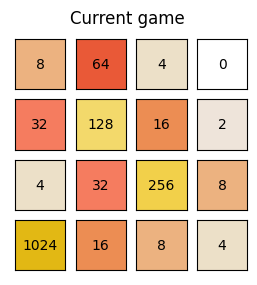

In [5]:

# Run the training
expectimax()